# 이항분류

> 진돗개, 닥스훈트 분류 데이터

## #01. 준비작업

### [1] 패키지 가져오기


In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기


In [2]:
origin = my_read_excel(
    path="https://data.hossam.kr/mldata/dogs.xlsx", categories=["dog"]
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   dog     200 non-null    category
 1   length  200 non-null    float64 
 2   height  200 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 3.6 KB
None

상위 5개 행
+----+-------+----------+----------+
|    | dog   |   length |   height |
|----+-------+----------+----------|
|  0 | d     |    55.01 |    29.27 |
|  1 | d     |    59.01 |    29.39 |
|  2 | d     |    56.53 |     28.5 |
|  3 | d     |    53.66 |     28.5 |
|  4 | d     |    49.67 |    31.97 |
+----+-------+----------+----------+

하위 5개 행
+-----+-------+----------+----------+
|     | dog   |   length |   height |
|-----+-------+----------+----------|
| 195 | j     |    50.95 |    52.37 |
| 196 | j     |    51.86 |     52.4 |
| 197 | j     |    54.24 |    47.82 |
| 198 | j     |    53.13 |    50.22 |
| 199 | j     |       53 |    5

## #02. 데이터 전처리

### [1] 종속변수 라벨링

분류를 수행할 경우 종속변수가 라벨링이 되어 있어야 하며, 데이터 타입이 정수 형태로 설정되어야 한다.


In [3]:
df = my_labelling(origin, "dog")
df

+-------+---------+
| dog   |   label |
|-------+---------|
| d     |       0 |
| j     |       1 |
+-------+---------+


,dog,length,height
0,0,55.01,29.27
1,0,59.01,29.39
2,0,56.53,28.50
3,0,53.66,28.50
4,0,49.67,31.97
...,...,...,...
195,1,50.95,52.37
196,1,51.86,52.40
197,1,54.24,47.82
198,1,53.13,50.22


### [2] 훈련, 검증 데이터 분리


In [4]:
x_train, x_test, y_train, y_test = my_train_test_split(data=df, yname="dog")
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

## #03. 훈련 모델 적합

### [1] 모델 구성

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 분류 | 이항분류 | [relu, ] sigmoid | rmsporp | binary_crossentropy | acc | 타이타닉 생존률 예측 |


In [5]:
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

### [2] 모델 학습


In [6]:
result = model.fit(
    x_train,
    y_train,
    epochs=500,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10, verbose=0),
        ReduceLROnPlateau(monitor="val_loss", patience=5, min_lr=0.0001, verbose=0),
    ],
)

### [3] 학습 곡선 확인


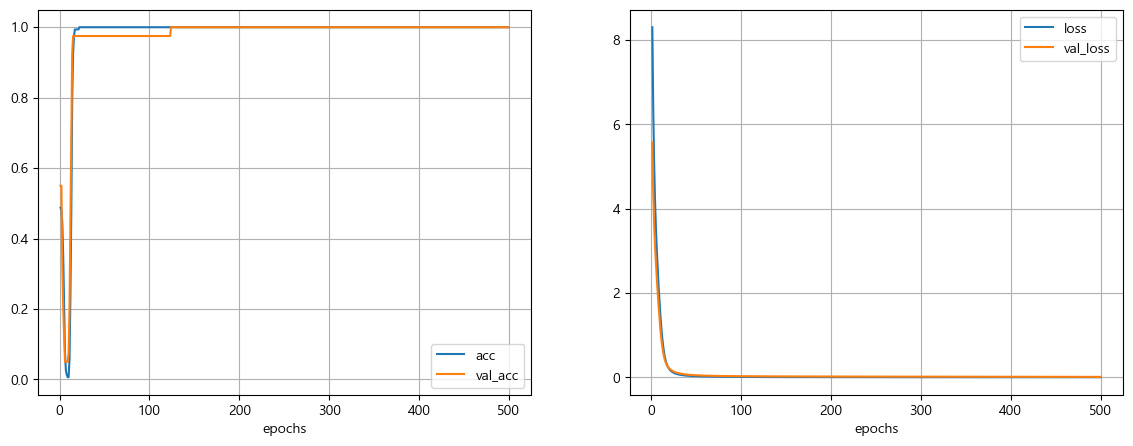

+----------+---------+-------------+-----------+------------+-----------------+
|   epochs |     acc |        loss |   val_acc |   val_loss |   learning_rate |
|----------+---------+-------------+-----------+------------+-----------------|
|        1 |  0.4875 |      8.3034 |      0.55 |    5.56576 |           0.001 |
|        2 | 0.48125 |     6.37671 |      0.55 |    4.36323 |           0.001 |
|        3 | 0.44375 |     5.08919 |     0.325 |    3.60812 |           0.001 |
|        4 |    0.35 |     4.19459 |       0.2 |    3.11399 |           0.001 |
|        5 | 0.20625 |      3.5412 |     0.125 |    2.70036 |           0.001 |
|        6 |   0.075 |     3.00938 |      0.05 |    2.33246 |           0.001 |
|        7 |   0.025 |     2.55189 |      0.05 |    1.99391 |           0.001 |
|        8 |  0.0125 |     2.14719 |      0.05 |     1.6784 |           0.001 |
|        9 | 0.00625 |     1.78351 |      0.05 |    1.38706 |           0.001 |
|       10 | 0.00625 |      1.4609 |    

In [7]:
tf_result(result, history_table=True)

## #04. 성능평가

### [1] 검증 데이터에 대한 예측 결과 산정

sklearn의 경우 `predict()` 의 결과가 1차 배열로 리턴되지만 tensor는 2차 배열로 리턴된다.

sklearn의 성능평가 함수를 활용하기 위해서는 `predict()` 의 결과를 1차 배열로 변환해야 한다.


In [8]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(test_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
40개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[5.90586606e-05]
 [1.00000000e+00]
 [1.00000000e+00]
 [6.30267152e-07]
 [9.99972224e-01]
 [1.00000000e+00]
 [3.68072619e-06]
 [9.96662319e-01]
 [4.75582740e-10]
 [9.99999940e-01]
 [2.74428999e-07]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.60944431e-06]
 [1.09532095e-07]
 [4.46730951e-11]
 [9.99999642e-01]
 [4.50657308e-06]
 [3.44486689e-05]
 [9.99999821e-01]
 [9.99999940e-01]
 [7.93580330e-05]
 [9.99999881e-01]
 [8.01998912e-09]
 [9.64019239e-01]
 [9.99993920e-01]
 [9.99994695e-01]
 [1.00000000e+00]
 [8.22608737e-09]
 [9.42537736e-05]
 [2.28437731e-08]
 [9.99999583e-01]
 [1.00000000e+00]
 [1.35425440e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.82679573e-05]
 [2.62904346e-01]
 [9.99990523e-01]]
